In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import sys
sys.executable

'C:\\Users\\barbara.oliveira\\Documents\\Particular\\TCC\\tccenv\\Scripts\\python.exe'

In [52]:
sns.set_palette('rainbow',8, 0.45)

#sns.set(style='white')

In [5]:
files_path = 'Files'

In [6]:
rt_movies = pd.read_csv(os.path.join(files_path, "rotten_tomatoes_movies.csv"))

In [7]:
rt_reviews = pd.read_csv(os.path.join(files_path, "rotten_tomatoes_critic_reviews.csv"))

## Movies dataset

In [8]:
rt_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [9]:
rt_movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [10]:
rt_movies.dtypes

rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

In [11]:
rt_movies.shape

(17712, 22)

In [58]:
rt_reviews.shape

(1130017, 8)

In [59]:
rt_movies.rotten_tomatoes_link.nunique()

17712

In [64]:
rt_reviews.rotten_tomatoes_link.nunique()

17712

In [70]:
rt_reviews.groupby(["rotten_tomatoes_link"])["review_content"].count().sort_values(ascending=False).head(10)

rotten_tomatoes_link
m/star_wars_the_rise_of_skywalker            992
m/solo_a_star_wars_story                     948
m/star_wars_the_last_jedi                    946
m/rogue_one_a_star_wars_story                892
m/spider_man_far_from_home                   880
m/star_wars_episode_vii_the_force_awakens    874
m/ready_player_one                           866
m/shazam                                     806
m/spider_man_homecoming                      780
m/roma_2018                                  774
Name: review_content, dtype: int64

In [12]:
rt_movies.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

In [13]:
rt_movies.content_rating.value_counts()

R        6377
NR       5474
PG-13    2979
PG       2168
G         676
NC17       38
Name: content_rating, dtype: int64

In [54]:
rt_movies.tomatometer_status.value_counts()

Rotten             7565
Fresh              6844
Certified-Fresh    3259
Name: tomatometer_status, dtype: int64

In [55]:
rt_reviews.review_type.value_counts()

Fresh     720210
Rotten    409807
Name: review_type, dtype: int64

In [14]:
rt_movies.genres.value_counts()

Drama                                                                                  1887
Comedy                                                                                 1263
Comedy, Drama                                                                           863
Drama, Mystery & Suspense                                                               731
Art House & International, Drama                                                        589
                                                                                       ... 
Art House & International, Classics, Cult Movies, Horror, Science Fiction & Fantasy       1
Action & Adventure, Cult Movies, Drama, Science Fiction & Fantasy                         1
Art House & International, Documentary, Sports & Fitness                                  1
Action & Adventure, Drama, Mystery & Suspense, Special Interest                           1
Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense            

In [15]:
rt_movies['split_genres'] = rt_movies.genres.str.split(',').str[0]

In [57]:
rt_movies.split_genres.value_counts()

Drama                        3789
Comedy                       3725
Action & Adventure           3551
Art House & International    2021
Documentary                  1725
Classics                     1110
Horror                        943
Animation                     379
Mystery & Suspense            289
Kids & Family                  46
Science Fiction & Fantasy      40
Musical & Performing Arts      26
Cult Movies                    22
Romance                        14
Western                         9
Special Interest                3
Television                      1
Name: split_genres, dtype: int64

<AxesSubplot:title={'center':'Distribuição de gêneros dos filmes'}>

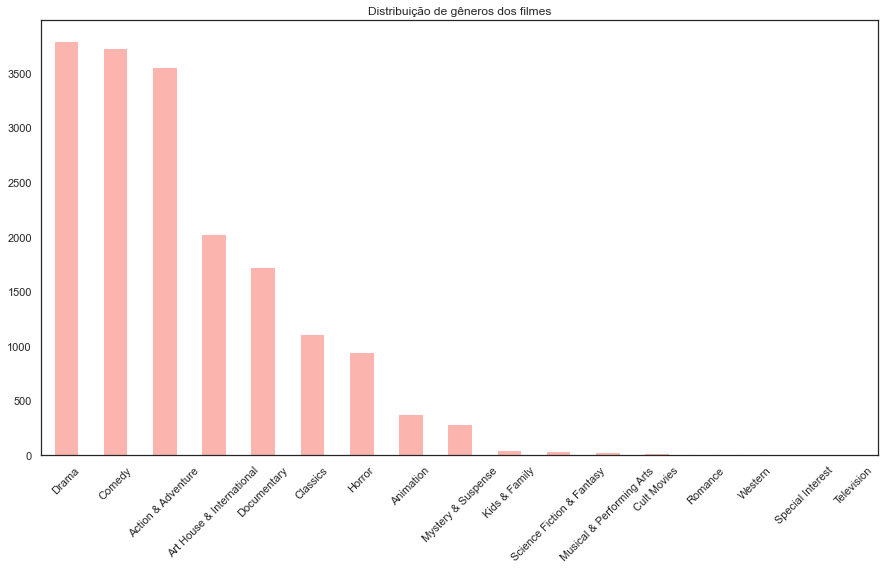

In [16]:
rt_movies.split_genres.value_counts().plot(kind='bar', figsize=(15,8), title='Distribuição de gêneros dos filmes', colormap='Pastel1', rot=45)

In [17]:
merged = rt_movies.merge(rt_reviews, on="rotten_tomatoes_link", how="inner")

<AxesSubplot:title={'center':'Distribuição de gêneros dos filmes'}, xlabel='split_genres'>

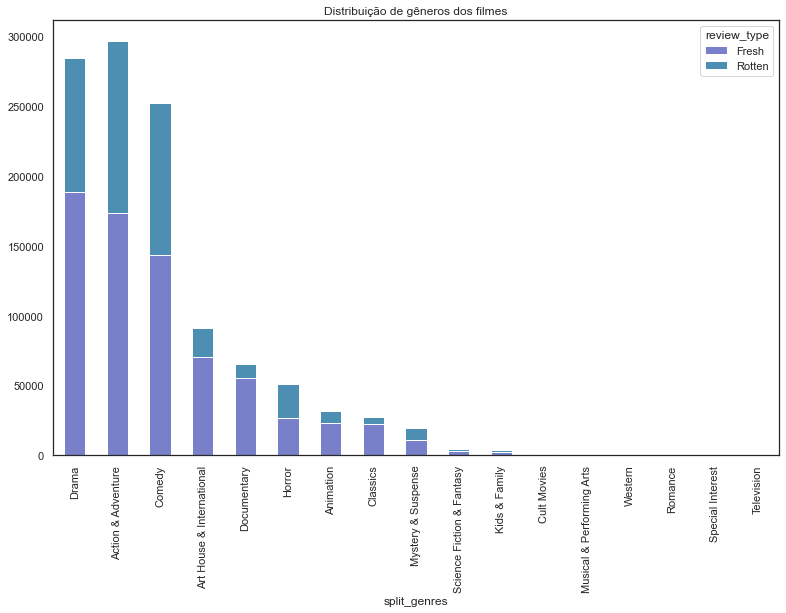

In [69]:
pd.crosstab(merged['split_genres'],merged['review_type']).sort_values(by= "Fresh", ascending=False).plot.bar(figsize=(13,8), title='Distribuição de gêneros dos filmes', stacked=True,  rot=90)

<AxesSubplot:title={'center':'Distribuição da classificação dos filmes'}>

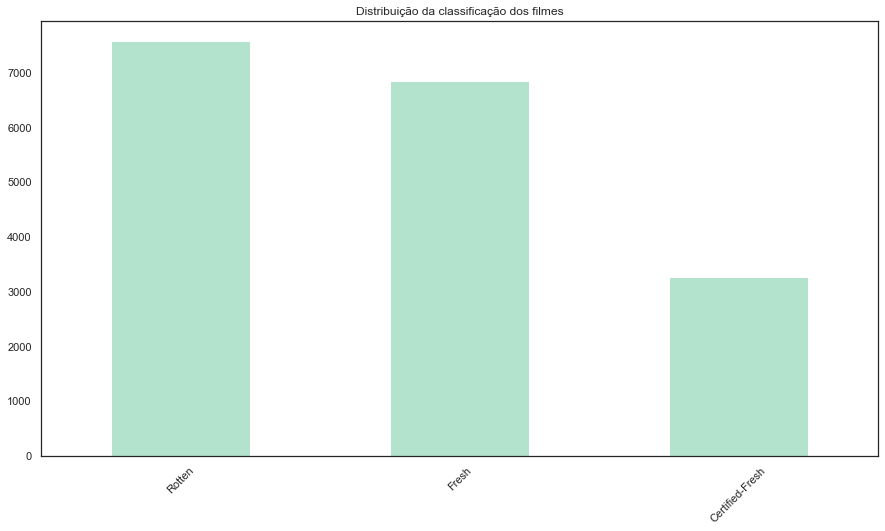

In [15]:
rt_movies.tomatometer_status.value_counts().plot(kind='bar',  figsize=(15,8), title='Distribuição da classificação dos filmes', colormap='Pastel2', rot=45)

In [16]:
rt_movies.tomatometer_rating.value_counts()

100.0    964
50.0     438
88.0     408
83.0     396
67.0     396
        ... 
4.0       46
5.0       41
3.0       21
2.0       11
1.0        6
Name: tomatometer_rating, Length: 101, dtype: int64

<AxesSubplot:>

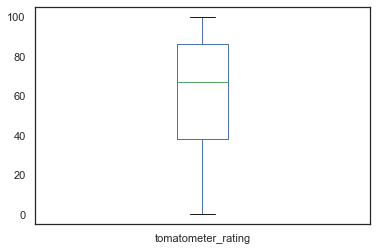

In [17]:
rt_movies.tomatometer_rating.plot(kind='box')

In [18]:
rt_movies.loc[rt_movies.movie_title == 'mother!']

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,split_genres
10619,m/mother_2017,mother!,A young woman spends her days renovating the V...,There's no denying that mother! is the thought...,R,"Drama, Horror, Mystery & Suspense",Darren Aronofsky,Darren Aronofsky,"Jennifer Lawrence, Javier Bardem, Ed Harris, M...",2017-09-15,...,Fresh,68.0,374.0,Spilled,51.0,24931.0,51,256,118,Drama


In [73]:
rt_movies.original_release_date.fillna('2222-02-02', inplace=True)

In [74]:
rt_movies['original_release_date'] = pd.to_datetime(rt_movies['original_release_date'])

In [75]:
max(rt_movies.original_release_date.loc[rt_movies.original_release_date != '2222-02-02'])

Timestamp('2020-09-30 00:00:00')

In [76]:
min(rt_movies.original_release_date)

Timestamp('1914-06-01 00:00:00')

## Reviews dataset

In [77]:
rt_reviews.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [78]:
rt_reviews.dtypes

rotten_tomatoes_link    object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [79]:
rt_reviews.isnull().sum()

rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64

In [80]:
rt_reviews.review_type.value_counts()

Fresh     720210
Rotten    409807
Name: review_type, dtype: int64

<AxesSubplot:ylabel='review_type'>

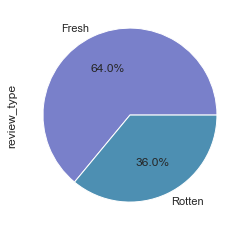

In [87]:
rt_reviews.review_type.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [75]:
rt_reviews.review_score.value_counts()

3/5          76972
4/5          73702
3/4          69641
2/5          50130
2/4          45359
             ...  
3.65/10          1
1.5/6            1
9.2021/10        1
8.56/10          1
5.76/10          1
Name: review_score, Length: 813, dtype: int64

In [28]:
len(rt_reviews)

1130017

In [29]:
rt_reviews.review_content.notnull().sum()

1064211

In [30]:
rt_reviews.review_date.notnull().sum()

1130017

In [82]:
rt_reviews['review_date'] = pd.to_datetime(rt_reviews['review_date'])

In [83]:
rt_reviews['review_year'] = rt_reviews['review_date'].apply(lambda x: x.year)

In [84]:
rt_reviews.rotten_tomatoes_link.notnull().sum()

1130017

In [85]:
rt_reviews = rt_reviews[rt_reviews.review_content.notnull()]

In [86]:
rt_reviews.review_type.value_counts()

Fresh     681035
Rotten    383176
Name: review_type, dtype: int64

In [88]:
rt_movies['movie_year'] = rt_movies.loc[rt_movies.original_release_date != '2222-02-02', 'original_release_date'].apply(lambda x: x.year)

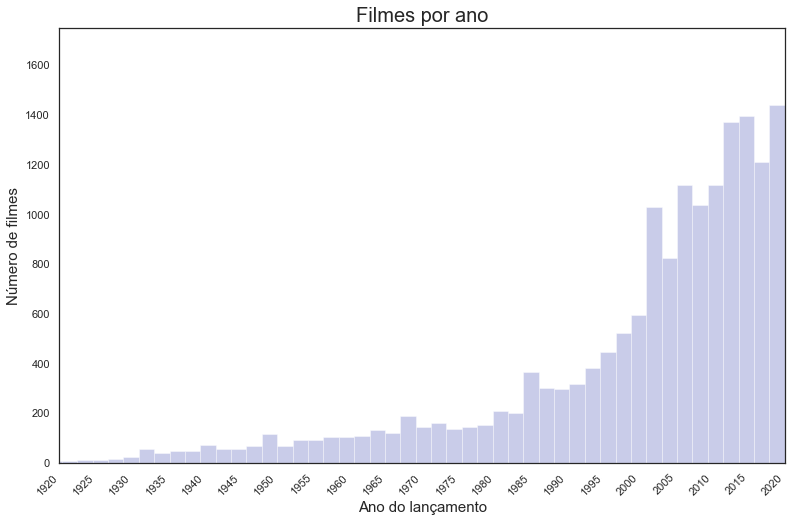

In [92]:
plt.figure(figsize=(13,8))
plt.title('Filmes por ano', size=20)
sns.distplot(rt_movies.movie_year, kde=False)
plt.ylabel('Número de filmes', size=15)
plt.xlabel('Ano do lançamento',size=15)
plt.axis([1920, 2020, 0, 1750])
plt.xticks(np.arange(1920, 2021, step=5),rotation=45, ha='right')
plt.show()

In [37]:
rt_reviews.review_year.value_counts().head(25)

2019    81900
2018    76295
2017    60572
2016    57876
2015    55280
2013    53932
2011    51337
2014    51006
2007    50690
2012    50583
2008    48861
2009    48504
2010    47417
2006    47345
2020    45739
2005    43544
2004    42902
2003    42406
2002    42283
2000    41078
2001    24300
1996       28
1998       27
1994       26
1990       24
Name: review_year, dtype: int64

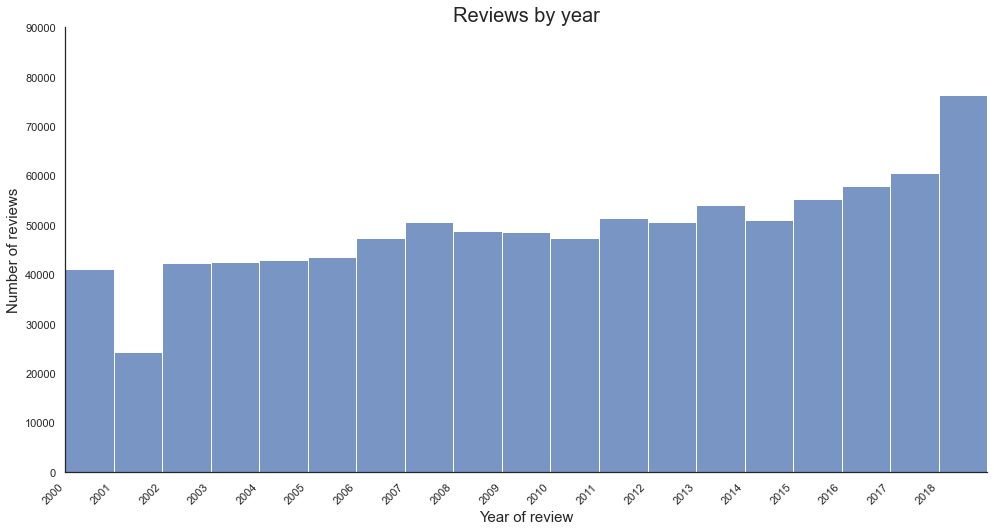

In [38]:
sns.displot(rt_reviews.loc[rt_reviews.review_year >= 2000, 'review_year'], bins=20, height=7, aspect=2)
plt.title('Reviews by year', size=20)
plt.ylabel('Number of reviews', size=15)
plt.xlabel('Year of review',size=15)
plt.axis([2000, 2019, 0, 90000])
plt.xticks(np.arange(2000, 2019, step=1),rotation=45, ha='right')
plt.show()

In [39]:
rt_reviews.review_content[9]

'Crammed with dragons, set-destroying fights and things exploding, [Columbus] squeezes in a few well-meaning pause breaks about friendship and absent fathers before swiftly moving on to the next pyrotechnics display.'

In [95]:
import stylecloud as sc

ModuleNotFoundError: No module named 'stylecloud'

## Modelling 


In [40]:
df = rt_reviews[['review_content', 'review_type']]

In [41]:
from sklearn.model_selection import train_test_split

X = df['review_content']
y = df['review_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

class_reglog = Pipeline([('tfidf', TfidfVectorizer()),
                    ('class',  LogisticRegression(solver='lbfgs', max_iter=400))])

class_reglog.fit(X_train, y_train)
y_reglog = class_reglog.predict(X_test)

In [47]:
print(classification_report(y_test, y_reglog))

              precision    recall  f1-score   support

       Fresh       0.84      0.89      0.86    204324
      Rotten       0.78      0.69      0.73    114940

    accuracy                           0.82    319264
   macro avg       0.81      0.79      0.80    319264
weighted avg       0.82      0.82      0.82    319264



In [53]:
pd.crosstab(y_test, y_reglog, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Fresh,Rotten,All
True,,,
Fresh,181968,22356,204324
Rotten,35343,79597,114940
All,217311,101953,319264


In [55]:
# XGBoost
from sklearn.ensemble import GradientBoostingClassifier

class_xgb = Pipeline([('tfidf', TfidfVectorizer()),
                    ('class', GradientBoostingClassifier())])

class_xgb.fit(X_train, y_train)
y_xgb = class_xgb.predict(X_test)

In [56]:
print(classification_report(y_test, y_xgb))

              precision    recall  f1-score   support

       Fresh       0.67      0.98      0.80    204324
      Rotten       0.80      0.14      0.24    114940

    accuracy                           0.68    319264
   macro avg       0.74      0.56      0.52    319264
weighted avg       0.72      0.68      0.60    319264



In [57]:
pd.crosstab(y_test, y_xgb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Fresh,Rotten,All
True,,,
Fresh,200315,4009,204324
Rotten,98448,16492,114940
All,298763,20501,319264


In [59]:
# SVC
from sklearn.svm import LinearSVC

class_svc = Pipeline([('tfidf', TfidfVectorizer()),
                    ('class', LinearSVC())])

class_svc.fit(X_train, y_train)
y_svc = class_svc.predict(X_test)

In [60]:
print(classification_report(y_test, y_svc))

              precision    recall  f1-score   support

       Fresh       0.84      0.88      0.86    204324
      Rotten       0.77      0.71      0.74    114940

    accuracy                           0.82    319264
   macro avg       0.81      0.79      0.80    319264
weighted avg       0.82      0.82      0.82    319264



In [61]:
pd.crosstab(y_test, y_svc, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Fresh,Rotten,All
True,,,
Fresh,180275,24049,204324
Rotten,33659,81281,114940
All,213934,105330,319264


In [62]:
from sklearn.neighbors import KNeighborsClassifier

class_knn = Pipeline([('tfidf', TfidfVectorizer()),
                    ('class', KNeighborsClassifier())])

class_knn.fit(X_train, y_train)
y_knn = class_knn.predict(X_test)

In [63]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

       Fresh       0.68      0.69      0.68    204324
      Rotten       0.43      0.43      0.43    114940

    accuracy                           0.59    319264
   macro avg       0.56      0.56      0.56    319264
weighted avg       0.59      0.59      0.59    319264



In [65]:
pd.crosstab(y_test, y_knn, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Fresh,Rotten,All
True,,,
Fresh,140351,63973,204324
Rotten,65702,49238,114940
All,206053,113211,319264


In [69]:
model_performance = [accuracy_score(y_test, y_svc),accuracy_score(y_test, y_reglog),accuracy_score(y_test, y_xgb),accuracy_score(y_test, y_knn)]
models = ['Linear SVC', 'Logistic Regression', 'XGBoost', 'KNN']
df_model = pd.DataFrame(model_performance, columns=['Accuracy'])
df_model['Model'] = models
df_model

,Accuracy,Model
0,0.819247,Linear SVC
1,0.819275,Logistic Regression
2,0.679084,XGBoost
3,0.593831,KNN
